### Libraries Importing

In [44]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
# https://archive.ics.uci.edu/dataset/396/sales+transactions+dataset+weekly

In [45]:
# fetch dataset 
sales_transactions_weekly = fetch_ucirepo(id=396) 
  
# data (as pandas dataframes) 
dataset = sales_transactions_weekly.data.features 

In [46]:
dataset.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


### Basic Info

In [47]:
dataset.shape

(811, 106)

In [48]:
dataset.describe(exclude='object')

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.085000,0.000000,0.10500,0.100000,0.110000,0.090000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,0.280000,0.270000,0.300000,0.310000,0.330000,0.310000,0.33000,0.330000,0.350000,0.430000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,0.490000,0.450000,0.500000,0.500000,0.500000,0.500000,0.50000,0.550000,0.560000,0.670000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Preprocessing

#### Handling Missing Values

In [49]:
dataset.isnull().sum()

W0               0
W1               0
W2               0
W3               0
W4               0
                ..
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
Length: 106, dtype: int64

In [50]:
dataset.shape

(811, 106)

In [51]:
dataset.columns

Index(['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=106)

#### Duplicates

In [52]:
# Find and remove duplicates
dataset = dataset.drop_duplicates()

# Verify the shape after removing duplicates
dataset.shape

(811, 106)

### Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
# Select numerical features
numerical_features = dataset[numerical_cols]

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Convert scaled features back to a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_cols, index=dataset.index)
scaled_features_df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.173919,0.228600,0.046817,-0.126810,0.261727,0.197725,0.320853,0.875257,-0.279445,0.328879,...,-0.896267,-0.263463,-0.094387,0.282308,0.600801,-1.183443,-0.428828,-0.659373,-0.891511,-0.110890
1,-0.157764,-0.249221,-0.490115,-0.569780,-0.196719,-0.660624,-0.278886,-0.504996,-0.500980,-0.508909,...,-0.371585,0.438369,0.741373,-0.824292,-0.853567,0.321079,0.587434,-0.903710,0.769424,-1.250744
2,-0.157764,0.148963,-0.106592,-0.052982,0.032504,-0.114402,-0.203919,0.261811,0.163624,-0.280421,...,-0.109243,2.777809,-0.474278,-0.519023,0.091772,0.509144,2.402188,0.317979,0.260975,-0.198571
3,0.256839,-0.089947,0.276931,-0.348295,-0.043904,-0.270465,-0.053984,0.261811,0.237469,0.100392,...,0.415439,0.711303,-0.930148,-0.747975,-0.344538,0.133014,1.349631,-0.031075,-0.281371,-0.227798
4,-0.074843,-0.328858,0.276931,0.094675,-0.273127,-0.192434,-0.053984,0.338492,-0.057910,-0.051933,...,-0.109243,0.945247,-0.132376,1.083639,-0.489975,-0.431182,-0.755483,0.597223,-0.145785,-0.081663


### Dimensional Reduction

In [54]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)  # keep enough components to preserve 95% of variance
df_pca = pca.fit_transform(scaled_features_df)

# Step 2: Create DataFrame with principal components
pca_columns = [f'PC{i+1}' for i in range(df_pca.shape[1])]
df_reduced = pd.DataFrame(df_pca, columns=pca_columns)

# Step 3: (Optional) Check how much variance each PC explains
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each PC: {explained_variance}")
print(f"Total number of PCs retained: {len(pca_columns)}")

# Step 4: Final dataset after dimensionality reduction
print(df_reduced.head())

Explained Variance by each PC: [0.55550203 0.07757977 0.01700016 0.01260757 0.01080263 0.01048163
 0.01020781 0.00992352 0.00965921 0.00948605 0.00904829 0.00885172
 0.0087736  0.00865436 0.00835184 0.00816457 0.00794631 0.00762599
 0.00759319 0.00742121 0.0073589  0.00715499 0.00712449 0.0069703
 0.00686466 0.00675616 0.00666675 0.0066076  0.00641796 0.00622246
 0.00606333 0.00594331 0.00589111 0.00566341 0.00556024 0.0054184
 0.00532806 0.0051555  0.00499734 0.00493413 0.00478371 0.0046922
 0.00465022 0.00455216 0.00445808]
Total number of PCs retained: 45
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.230885  1.272477 -2.478723 -0.481288 -1.089454  0.200798  0.310694   
1 -1.697013  3.545676 -2.277077 -1.292394  0.435574 -1.053283 -1.414376   
2  2.103182  5.077005 -1.192888 -0.036061  1.261893  1.279963 -0.237209   
3  0.367058  1.593169 -1.377819 -0.451549  1.817970 -0.786959 -2.056319   
4  0.416859  1.428319 -0.348193 -1.430762 -0.877432  0.66835

### Clustering Based

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

# Load your PCA-reduced or scaled dataset
df = df_reduced.copy()

# Step 1: Apply clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(df)

# Step 2: Add labels to DataFrame
df['Cluster'] = labels

# Step 3: Calculate distances to cluster center
centroids = kmeans.cluster_centers_
df['Distance'] = np.linalg.norm(df.drop(columns=['Cluster']).values - centroids[df['Cluster']], axis=1)

# Step 4: Anomaly detection using distance threshold (e.g., top 5% as anomalies)
threshold = np.percentile(df['Distance'], 95)
df['Anomaly'] = df['Distance'] > threshold

# Step 5: Evaluation metrics (for clustering)
sil_score = silhouette_score(df.drop(columns=['Cluster', 'Distance', 'Anomaly']), labels)
db_index = davies_bouldin_score(df.drop(columns=['Cluster', 'Distance', 'Anomaly']), labels)
ch_score = calinski_harabasz_score(df.drop(columns=['Cluster', 'Distance', 'Anomaly']), labels)

print("Evaluation Metrics:")
print(f"✅ Silhouette Score: {sil_score:.4f}")
print(f"✅ Davies-Bouldin Index: {db_index:.4f}")
print(f"✅ Calinski-Harabasz Index: {ch_score:.4f}")

# Step 6: View anomalies
# anomalies = df[df['Anomaly'] == True]
# print(f"\nTotal anomalies detected: {len(anomalies)}")
# print(anomalies.head())

Evaluation Metrics:
✅ Silhouette Score: 0.4635
✅ Davies-Bouldin Index: 0.8126
✅ Calinski-Harabasz Index: 670.2151


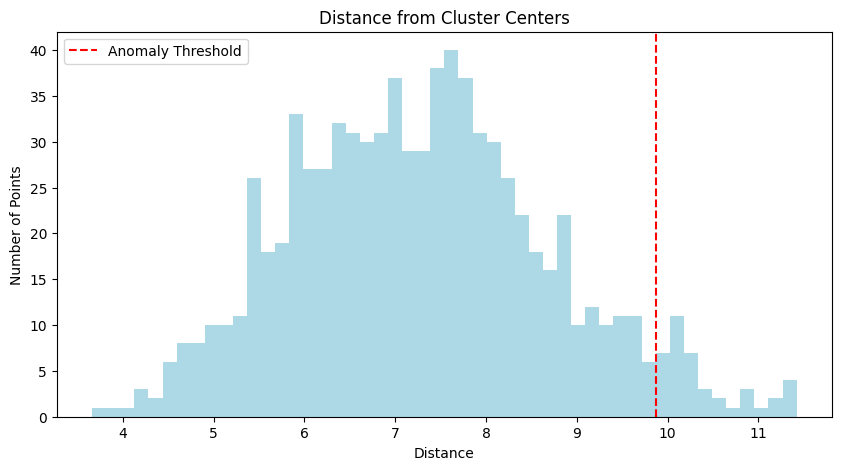

In [56]:
# Optional: Visualize distances
plt.figure(figsize=(10, 5))
plt.hist(df['Distance'], bins=50, color='lightblue')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Distance from Cluster Centers")
plt.xlabel("Distance")
plt.ylabel("Number of Points")
plt.legend()
plt.show()

### K Means Clustering

In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Step 1: Load your scaled or PCA-reduced dataset
df2 = df_reduced.copy()

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df2)

# Step 3: Assign cluster labels
df2['Cluster'] = labels

# Step 4: Compute distances from each point to its cluster center
centroids = kmeans.cluster_centers_
df2['Distance'] = np.linalg.norm(df2.drop(columns=['Cluster']).values - centroids[df2['Cluster']], axis=1)

# Step 5: Identify anomalies based on distance threshold (e.g., top 5% are anomalies)
threshold = np.percentile(df2['Distance'], 95)
df2['Anomaly'] = df2['Distance'] > threshold

# Step 6: Clustering Evaluation Metrics
X = df2.drop(columns=['Cluster', 'Distance', 'Anomaly'])  # original features
silhouette2 = silhouette_score(X, labels)
davies_bouldin2 = davies_bouldin_score(X, labels)
calinski_harabasz2 = calinski_harabasz_score(X, labels)

# Step 7: Print results
print("✅ Evaluation Metrics for KMeans Clustering:")
print(f"Silhouette Score:         {silhouette2:.4f}  (Higher is better)")
print(f"Davies-Bouldin Index:     {davies_bouldin2:.4f}  (Lower is better)")
print(f"Calinski-Harabasz Score:  {calinski_harabasz2:.4f}  (Higher is better)")

# Step 8: View detected anomalies
# print(f"\n🔍 Total anomalies detected: {df2['Anomaly'].sum()}")
# print(df2[df2['Anomaly'] == True].head())

✅ Evaluation Metrics for KMeans Clustering:
Silhouette Score:         0.2861  (Higher is better)
Davies-Bouldin Index:     1.2739  (Lower is better)
Calinski-Harabasz Score:  588.7216  (Higher is better)


### Plots

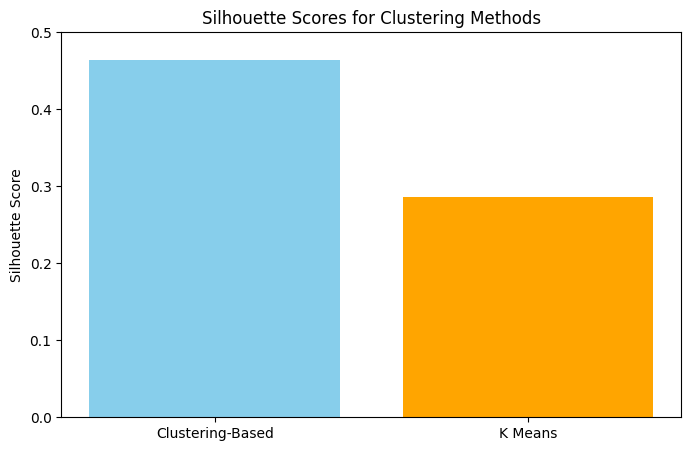

In [58]:
# Plot silhouette scores for the two clustering results
scores = [sil_score, silhouette2]
methods = ['Clustering-Based', 'K Means']

plt.figure(figsize=(8, 5))
plt.bar(methods, scores, color=['skyblue', 'orange'])
plt.title('Silhouette Scores for Clustering Methods')
plt.ylabel('Silhouette Score')
plt.ylim(0, 0.5)  # Silhouette scores range from -1 to 1
plt.show()

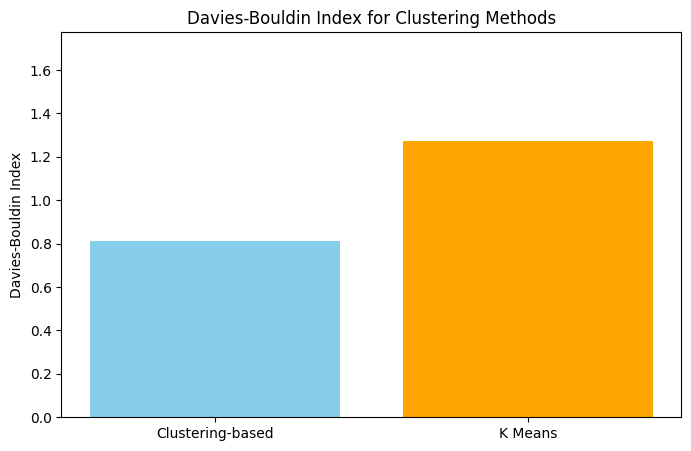

In [59]:
# Plot Davies-Bouldin Index for the two clustering results
db_scores = [db_index, davies_bouldin2]
methods = ['Clustering-based', 'K Means']

plt.figure(figsize=(8, 5))
plt.bar(methods, db_scores, color=['skyblue', 'orange'])
plt.title('Davies-Bouldin Index for Clustering Methods')
plt.ylabel('Davies-Bouldin Index')
plt.ylim(0, max(db_scores) + 0.5)  # Adjust y-axis limit for better visualization
plt.show()

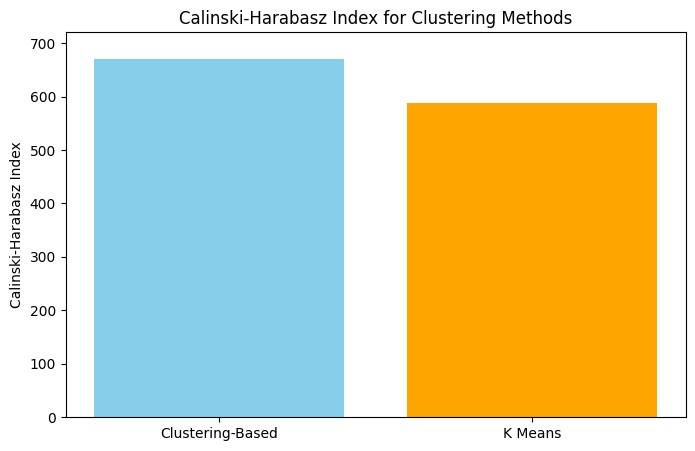

In [60]:
# Plot Calinski-Harabasz Index for the two clustering results
ch_scores = [ch_score, calinski_harabasz2]
methods = ['Clustering-Based', 'K Means']

plt.figure(figsize=(8, 5))
plt.bar(methods, ch_scores, color=['skyblue', 'orange'])
plt.title('Calinski-Harabasz Index for Clustering Methods')
plt.ylabel('Calinski-Harabasz Index')
plt.ylim(0, max(ch_scores) + 50)  # Adjust y-axis limit for better visualization
plt.show()

In [61]:
# Compare metrics
print("Comparison of Clustering Algorithms:")
print(f"Silhouette Score - Clustering-Based: {sil_score:.4f}, K Means: {silhouette2:.4f}")
print(f"Davies-Bouldin Index - Clustering-Based: {db_index:.4f}, K Means: {davies_bouldin2:.4f}")
print(f"Calinski-Harabasz Index - Clustering-Based: {ch_score:.4f}, K Means: {calinski_harabasz2:.4f}")

# Determine the best algorithm
if sil_score > silhouette2:
    print("\n✅ Clustering-Based has a better Silhouette Score.")
else:
    print("\n✅ K Means has a better Silhouette Score.")

if db_index < davies_bouldin2:
    print("✅ Clustering-Based has a better Davies-Bouldin Index.")
else:
    print("✅ K Means has a better Davies-Bouldin Index.")

if ch_score > calinski_harabasz2:
    print("✅ Clustering-Based has a better Calinski-Harabasz Index.")
else:
    print("✅ K Means has a better Calinski-Harabasz Index.")

Comparison of Clustering Algorithms:
Silhouette Score - Clustering-Based: 0.4635, K Means: 0.2861
Davies-Bouldin Index - Clustering-Based: 0.8126, K Means: 1.2739
Calinski-Harabasz Index - Clustering-Based: 670.2151, K Means: 588.7216

✅ Clustering-Based has a better Silhouette Score.
✅ Clustering-Based has a better Davies-Bouldin Index.
✅ Clustering-Based has a better Calinski-Harabasz Index.
